In [2]:
import requests as rq 
from bs4 import BeautifulSoup as bs
import pandas as pd

In [3]:
url = 'https://www.worldometers.info/world-population/population-by-country/'
response = rq.get(url)

soup = bs(response.content, 'html.parser')
#soup

In [4]:
table = soup.find('table', {'id': 'example2'})  # Replace 'example2' with the correct table ID or class
#table


In [5]:
tableheadingtags=table.find("tr")
#ableheadingtags

In [6]:
Tableheadings=[]
#for x in tableheadingtags.find_all("tr"):
for y in tableheadingtags.find_all("th"):
  Tableheadings.append(y.text)
#Tableheadings

In [7]:
tablerowtags=table.find_all("tr")
#tablerowtags

In [8]:
#Tablerows=[]
#for y in table.find_all("td"):
#  Tablerows.append(y.text)
#Tablerows
Tablerows=[]
for x in table.find_all("tr")[1:]:
   tdtags = x.find_all("td")
   td_values=[y.text for y in tdtags]
        
       #print(td_elements)
        #print("under")
   Tablerows.append(td_values)
   #print("Out")
#print(Tablerows)

In [9]:
col = pd.MultiIndex.from_arrays([["World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)",
                                  "World's Population Data For each Country Chronologically(Highest to Lowest)"],
                                 ["#","Country (or dependency)","Population (2020)","Yearly Change","Net Change","Density (P/Km²)","Land Area (Km²)",
                                  "Migrants (net)","Fert. Rate","Med. Age","Urban Pop %","World Share"]])

In [10]:
#cols=
df1=pd.DataFrame(Tablerows,columns=col)
df1=df1.drop(columns=df1.columns[3:], inplace=False)
#a=df1.to_csv("World_pop_Data_From_worldometer.csv",index=False)
df1=df1.style.set_properties(**{'head-align': 'left'})
#df1=pd.DataFrame(df1)
df1

# To Scrap Individual Country Data

### Instructions:  For Data of any country individually, U just need to Enter the Name of the Particular country in lower case letters in the Prompt.

In [11]:
# Anytime U want to change the country data,You need enter the Country name in Lower-case letters

In [12]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
Countryname=input("Enter the Country name in Lower case letter")
url=("https://www.worldometers.info/world-population/"+Countryname+"-population/")
url

'https://www.worldometers.info/world-population/japan-population/'

## Check the Prompt Above on the  center Top of the screen
## Before Executing the next cell, make sure u've input the country name

In [14]:

#url = 'https://www.worldometers.info/world-population/china-population/'

response = rq.get(url)
url

'https://www.worldometers.info/world-population/japan-population/'

In [15]:
soup = bs(response.content, 'html.parser')

In [16]:
table = soup.find('table', {'class': "table table-striped table-bordered table-hover table-condensed table-list"})

#a=table.thead.text
#table
#tableheadtag1=table.find_all("thead")
#tableheadtag1
#tablehead=tableheadtag1.find("tr")

In [17]:
Tableheadings=[]
for y in table.find_all("th"):
  Tableheadings.append(y.text)
#Tableheadings

## In case of Error:
> Make Sure u've the fair Internet Connection \
> The Entered Country Name is correct


In [18]:
tablerowtags=table.find_all("tr")[1:]
#tablerowtags


In [19]:
Tablerows=[]
for x in table.find_all("tr")[1:]:
   tdtags = x.find_all("td")
   td_values=[y.text for y in tdtags]
        
       #print(td_elements)
        #print("under")
   Tablerows.append(td_values)
   #print("Out")
#print(Tablerows)

In [20]:
mldf=pd.DataFrame(Tablerows,columns=Tableheadings)
mldfr=mldf.drop(columns=mldf.columns[2:], inplace=False)
mldfr["Population"]=mldfr["Population"].str.replace(',','')
#df['x']=df['x'].str.replace(',','')
#mldfr["Population"]

In [21]:
Mh=("Population of"+" "+Countryname+" "+"from 1955 to 2020")

In [22]:
col = pd.MultiIndex.from_arrays([[Mh,Mh,Mh,
                                  Mh,Mh,Mh,
                                  Mh,Mh,Mh, 
                                  Mh,Mh,Mh,
                                  Mh],
                                 ['Year',   'Population','Yearly %  Change','Yearly Change','Migrants (net)',
                                   'Median Age','Fertility Rate','Density (P/Km²)','Urban Pop %','Urban Population',
                                   "Country's Share of World Pop",'World Population','ChinaGlobal Rank']])

In [23]:
a=pd.DataFrame(Tablerows,columns=col)
b=a.drop(columns=a.columns[2:], inplace=False)
c=pd.DataFrame(b)
c=c.style.set_properties(**{'head-align': 'left'})
c
#csvfile=c.to_csv(Countryname+" "+"Pop_Data.csv",index=False)

# Prediction By Machine Learning

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [25]:
#mldf["Population"]

In [26]:

X=mldfr[["Year"]]
y=mldfr["Population"]   

In [27]:
model=LinearRegression()
model.fit(X,y)
x=input("Enter the year to predict the population of the Country")
x=int(x)
if x>2023:
    hv="will be"
elif x==2023:
    hv="is"
else:
    hv="was"
x=str(x)
print("The Population of"+"  "+Countryname+" "+"in" + " " + x + " "+ hv,model.predict([[x]]))
#print("The Population of country in" + x + "is",model.predict([[x]]))



The Population of  japan in 2024 will be [1.34674102e+08]


c:\Users\Syscom\anaconda3\AnacondaInstal\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Syscom\anaconda3\AnacondaInstal\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


> Here the Exponential:\
>  8 or e+08 = 1 Crore Or 10 Million \
>  e+09 = 100  Crore Or 1000 Million Or 1 Billion
>                           

In [28]:
mldfr["Population"]=(mldfr["Population"].astype(int))/1000000

# Plotting Graph of Population with rest to Each Year

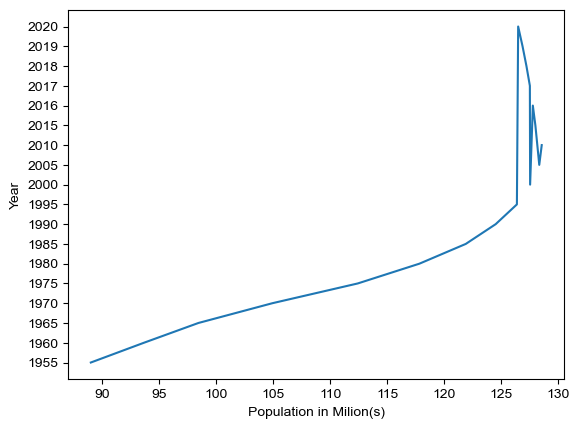

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(y="Year",x="Population",data=mldfr)
plt.xlabel("Population in Milion(s)")
#plt.ylabel("Year")
sns.set_style("darkgrid")